In [ ]:
#importing the data set and loading the data set

import pandas as pd

# Load the dataset
file_path = '/content/Prediction-of-Obesity-Risk.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to inspect
data.head()

# Get basic information about the dataset
data.info()

# Display summary statistics for numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20805 entries, 0 to 20804
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20805 non-null  int64  
 1   Gender                          20805 non-null  object 
 2   Age                             20805 non-null  float64
 3   Height                          20654 non-null  float64
 4   Weight                          20805 non-null  float64
 5   family_history_with_overweight  20664 non-null  object 
 6   FAVC                            20805 non-null  object 
 7   FCVC                            20659 non-null  float64
 8   NCP                             20628 non-null  float64
 9   CAEC                            20805 non-null  object 
 10  SMOKE                           20805 non-null  object 
 11  CH2O                            20805 non-null  float64
 12  SCC                             

id           Age        Height        Weight          FCVC  \
count  20805.000000  20805.000000  20654.000000  20805.000000  20659.000000   
mean   10367.823696     23.838389      1.700217     87.906013      2.445947   
std     5994.966567      5.686111      0.087295     26.381413      0.532989   
min        0.000000     14.000000      1.450000     39.000000      1.000000   
25%     5171.000000     20.000000      1.631856     66.000000      2.000000   
50%    10364.000000     22.815416      1.700000     84.191125      2.393837   
75%    15560.000000     26.000000      1.762461    111.600553      3.000000   
max    20757.000000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20628.000000  20805.000000  20805.000000  20805.000000  
mean       2.761367      2.029674      0.981975      0.616794  
std        0.704554      0.608616      0.838123      0.601969  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.550307      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [ ]:
from sklearn.preprocessing import StandardScaler

# cleaning the data set

# Step 1: Handle Missing Values
# Impute missing values for numerical columns with mean and categorical columns with mode
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# For numerical columns, use mean imputation
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mean())

# For categorical columns, use mode imputation
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])

print("Missing values have been handled.\n")
print(data.info())  # Confirming no missing values remain

# Step 2: Remove Duplicates
# Check for duplicates and remove them if they exist
duplicates = data.duplicated().sum()
if duplicates > 0:
    data = data.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows.\n")
else:
    print("No duplicate rows found.\n")

# Step 3: Drop Unnecessary Columns
# Drop columns that do not contribute to the analysis (e.g., 'id')
if 'id' in data.columns:
    data = data.drop(columns=['id'])
    print("Dropped 'id' column as it's unnecessary for analysis.\n")

# Step 4: Convert Categorical Variables to Numerical Format
# Convert categorical columns using one-hot encoding
data = pd.get_dummies(data, drop_first=True)
print("Categorical variables converted to numerical format using one-hot encoding.\n")

# Step 5: Standardize Numerical Features
# Standardize numerical columns to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print("Numerical features standardized.\n")

# Display the first few rows after preprocessing
print("Data after preprocessing:")
print(data.head())


Missing values have been handled.

<class 'pandas.core.frame.DataFrame'>
Index: 20757 entries, 0 to 20804
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 20757 non-null  float64
 1   Height                              20757 non-null  float64
 2   Weight                              20757 non-null  float64
 3   FCVC                                20757 non-null  float64
 4   NCP                                 20757 non-null  float64
 5   CH2O                                20757 non-null  float64
 6   FAF                                 20757 non-null  float64
 7   TUE                                 20757 non-null  float64
 8   Gender_Male                         20757 non-null  bool   
 9   family_history_with_overweight_yes  20757 non-null  bool   
 10  FAVC_yes                            20757 non-null  bool   
 11  CAEC_Freque

In [ ]:
# inspecting the cleaned data set
# Display the first few rows of the cleaned data
print("First few rows of the cleaned data:")
print(data.head())

# Display basic information about the cleaned dataset
print("\nBasic information about the cleaned data:")
print(data.info())

# Display summary statistics for numerical columns to verify standardization
print("\nSummary statistics for numerical columns in cleaned data:")
print(data.describe())

# Check for any remaining missing values to confirm the dataset is clean
print("\nCount of missing values in each column:")
print(data.isnull().sum())


First few rows of the cleaned data:
        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0  0.105673 -0.001798 -0.235753 -0.839922  0.315929  1.206566 -1.171112   
1 -1.027057 -1.611348 -1.170966 -0.839922  0.339725 -0.048433  0.021775   
2 -1.027057  0.129980 -1.430045 -1.064826 -1.923059 -0.195735 -0.138018   
3 -0.507944  0.121587  1.644719  1.042654  0.339725 -0.584142  0.579883   
4  1.371148  2.460710  0.224011  0.439597 -1.125562 -0.081555  1.176458   

        TUE  Gender_Male  family_history_with_overweight_yes  ...  \
0  0.597389         True                                True  ...   
1  0.636464        False                                True  ...   
2  1.755192        False                                True  ...   
3  0.271406        False                                True  ...   
4  0.523063         True                                True  ...   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0        False             False

In [ ]:
# The inspection output confirms that the data is fully cleaned:

# No Missing Values: All columns have a non-null count equal to the total number of entries (20,757), indicating that missing values have been successfully handled.
# Correct Data Types: Numerical columns are in float64 format, and categorical columns have been converted into bool using one-hot encoding.
# Standardized Numerical Data: The mean and standard deviation of each numerical feature are close to 0 and 1, respectively, indicating successful standardization.
# No Duplicates: Duplicates were removed as reported.

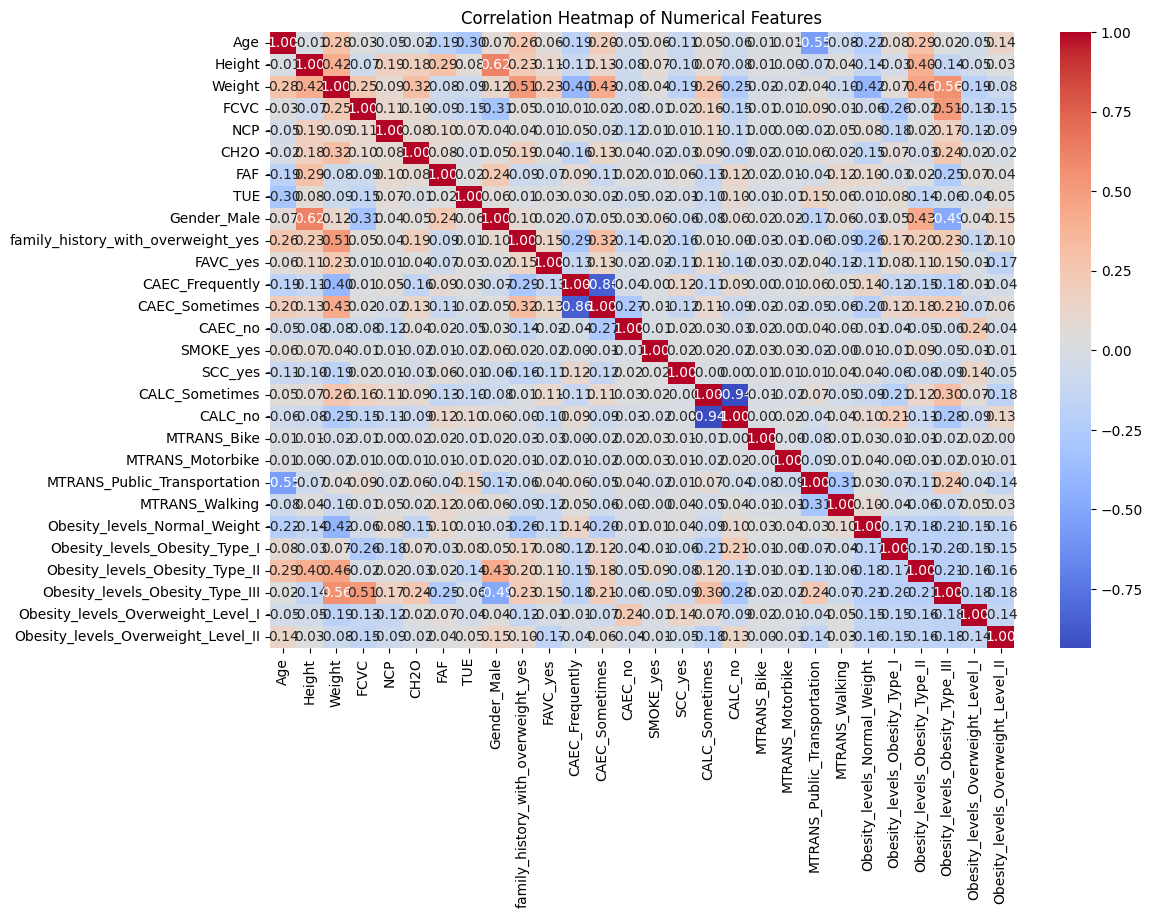

In [ ]:
#  Exploratory Data Analysis (EDA) techniques

# correlation heat map
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


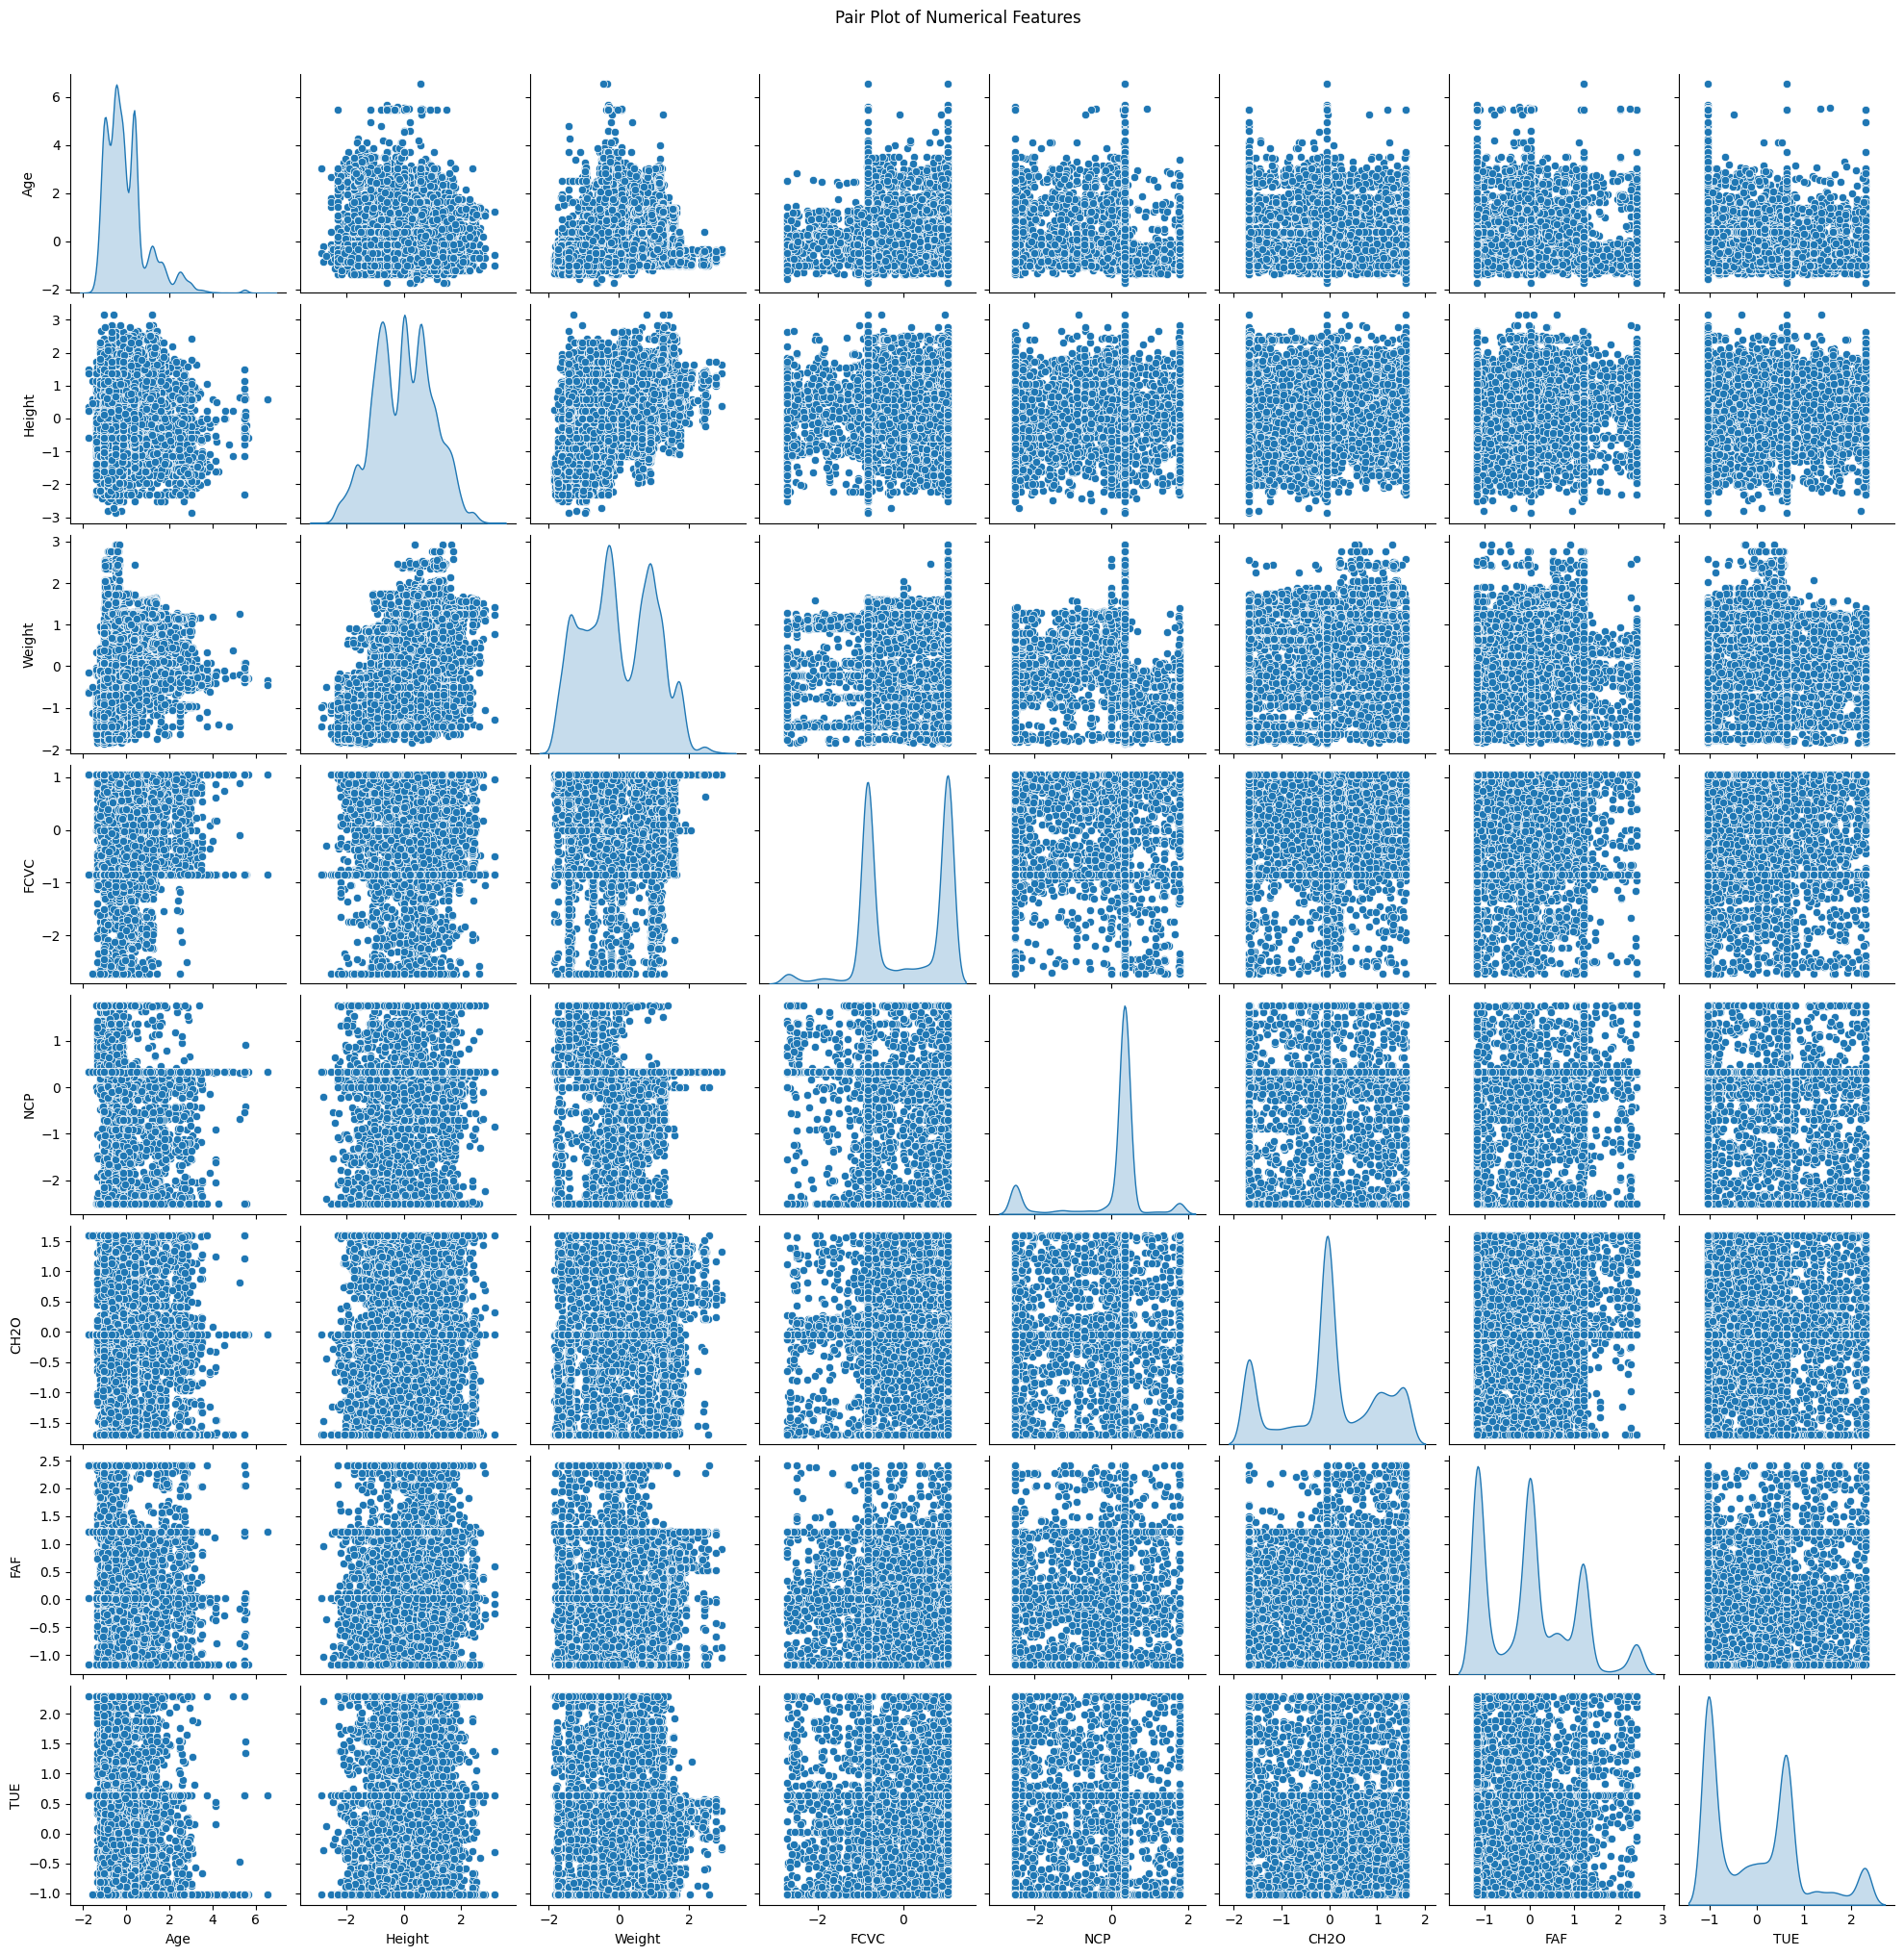

In [ ]:
# pair plot
# Pair plot of numerical features
sns.pairplot(data.select_dtypes(include=['float64']), diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


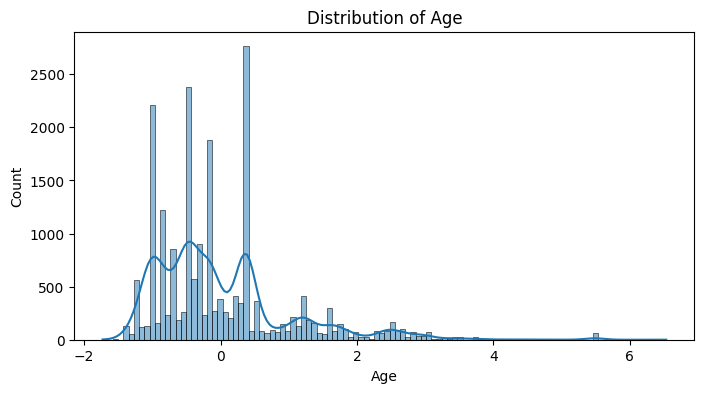

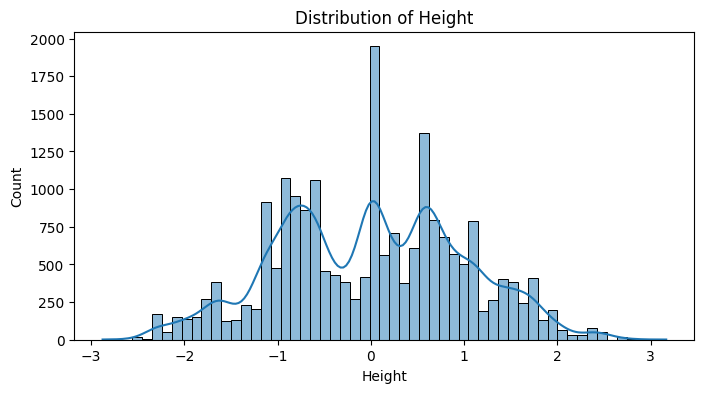

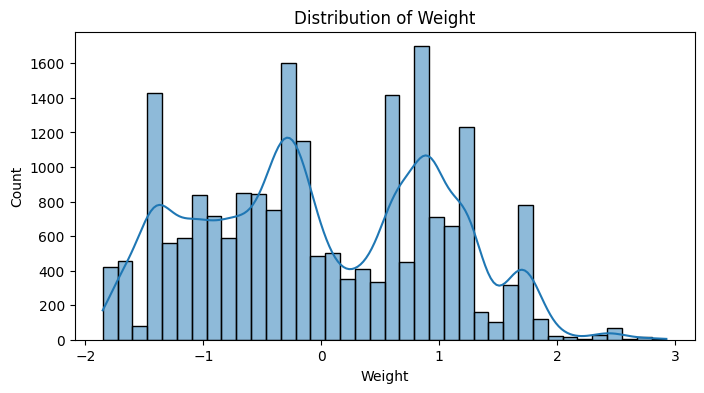

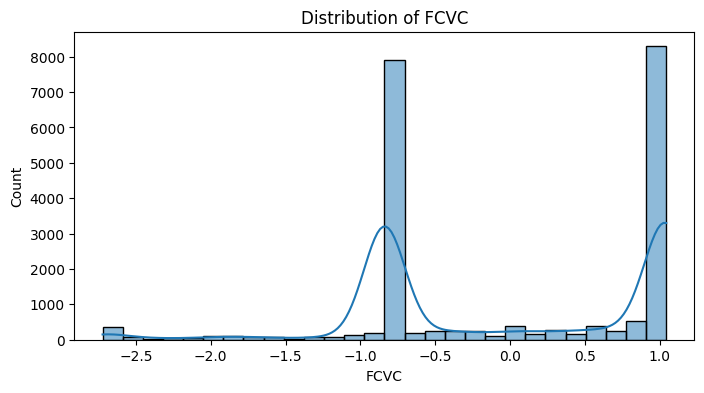

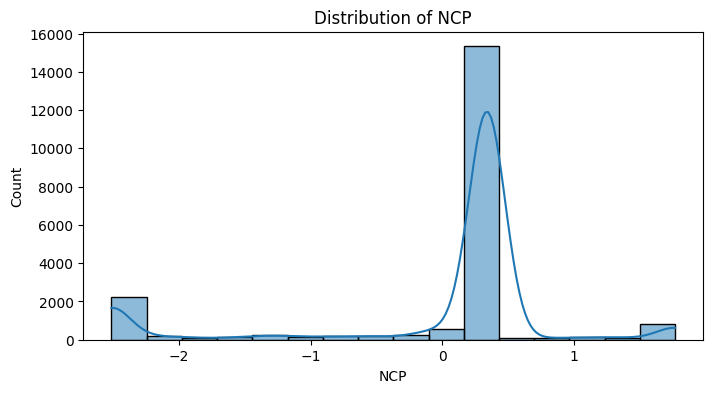

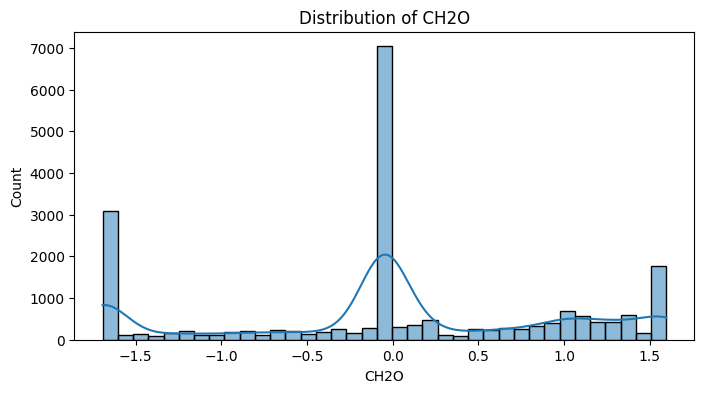

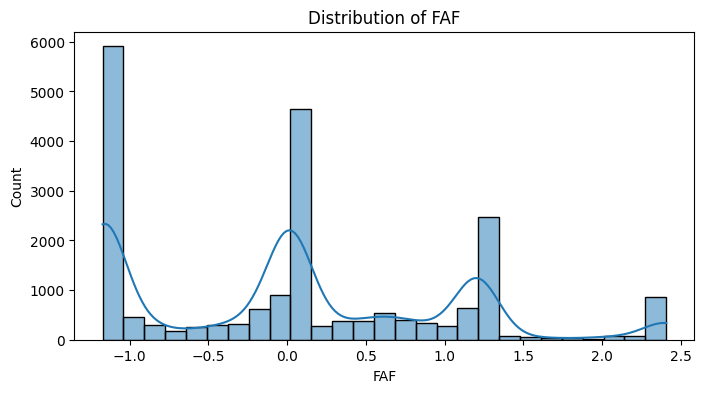

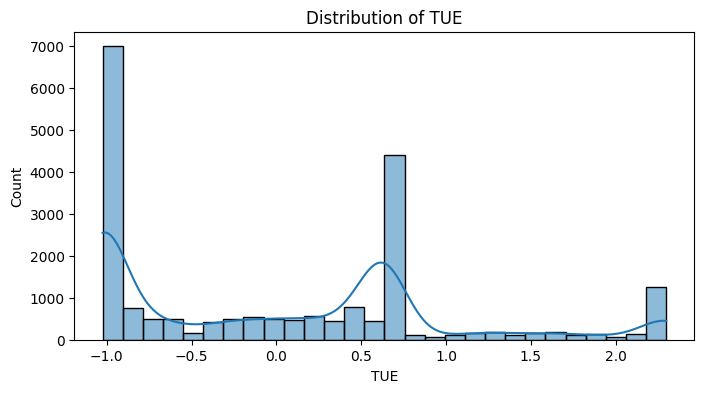

In [ ]:
# Distribution plots for each numerical feature
numerical_features = data.select_dtypes(include=['float64']).columns

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


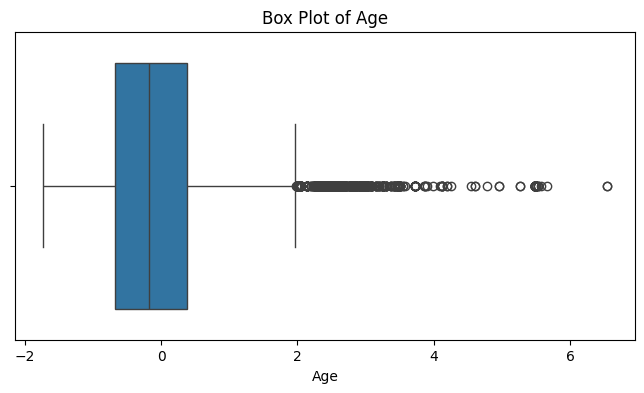

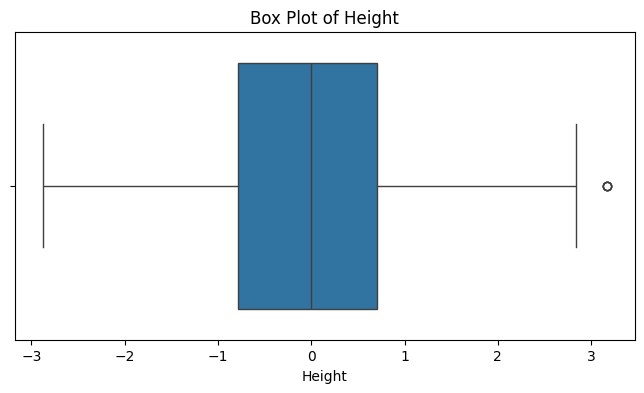

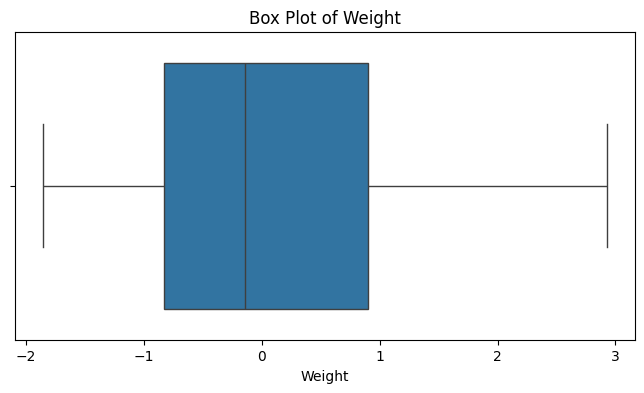

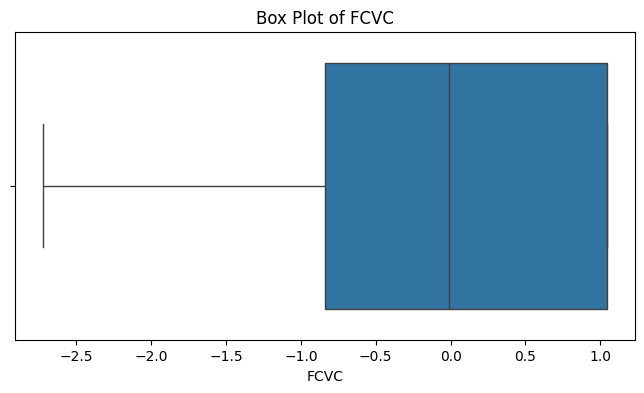

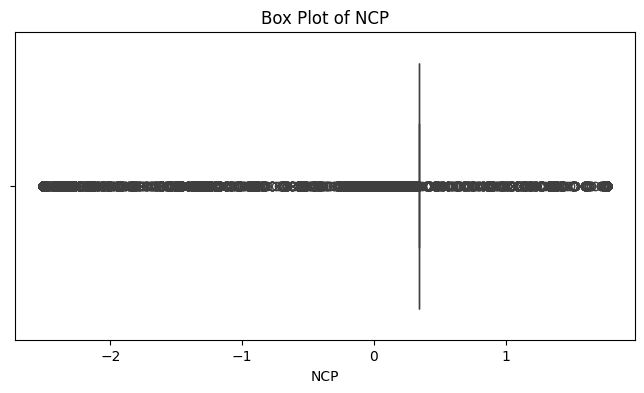

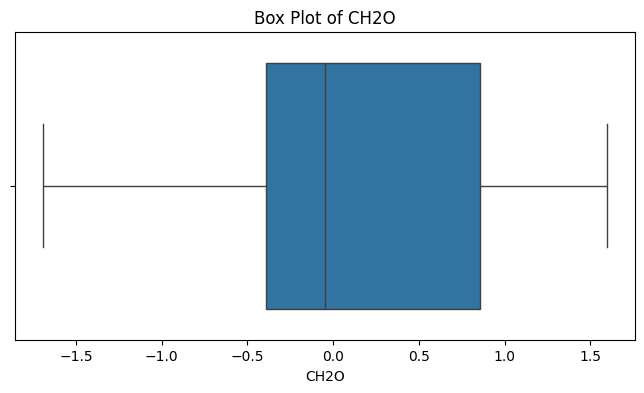

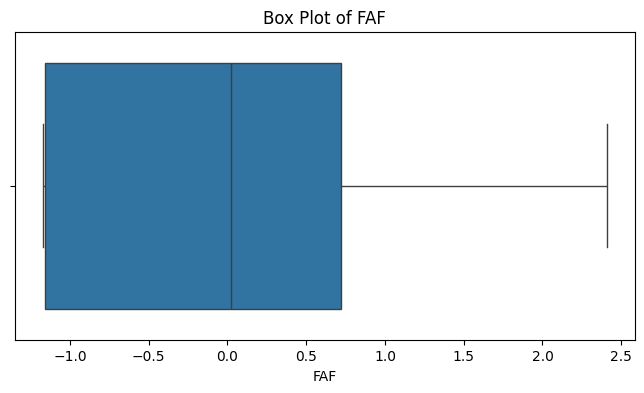

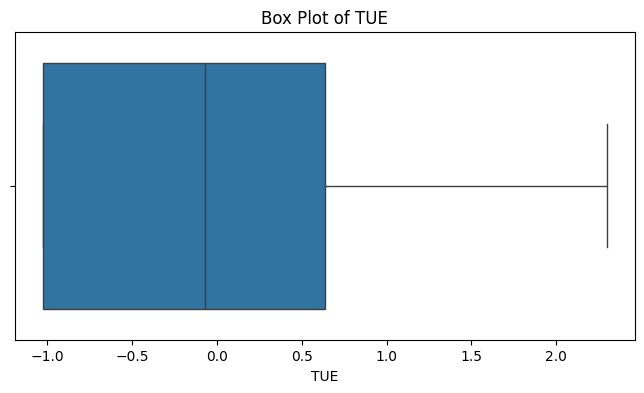

In [ ]:
# Box plots for each numerical feature
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


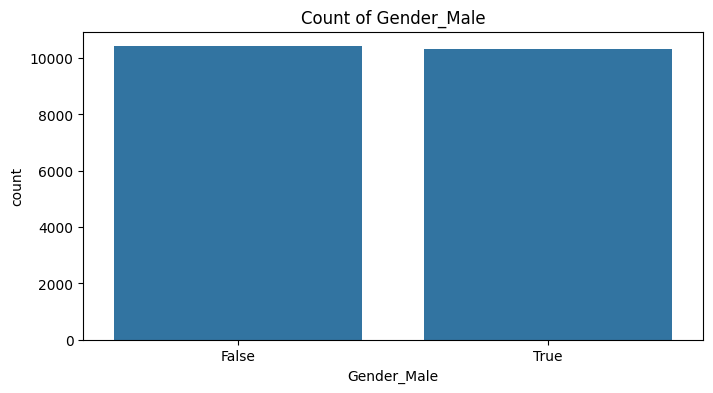

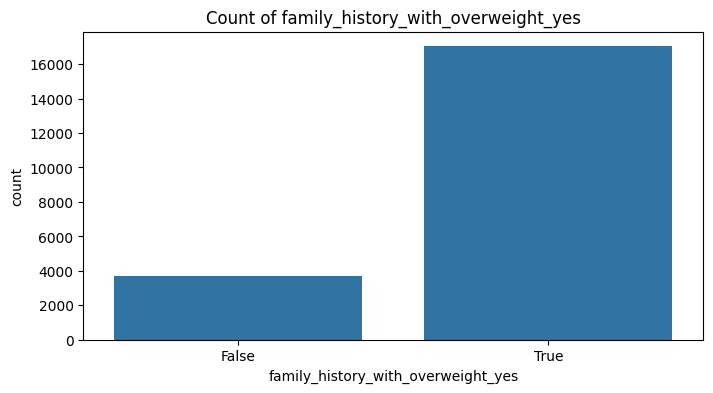

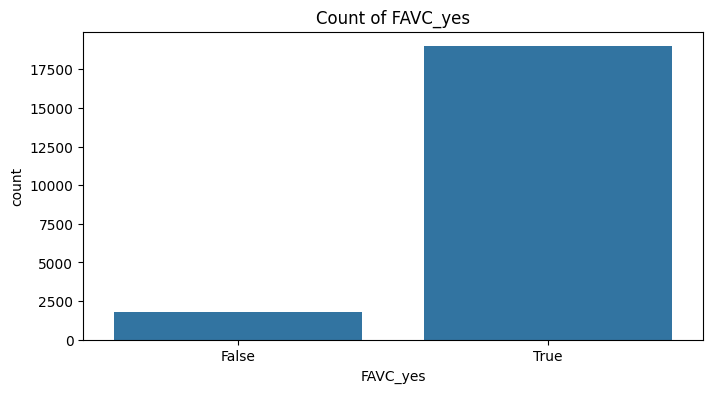

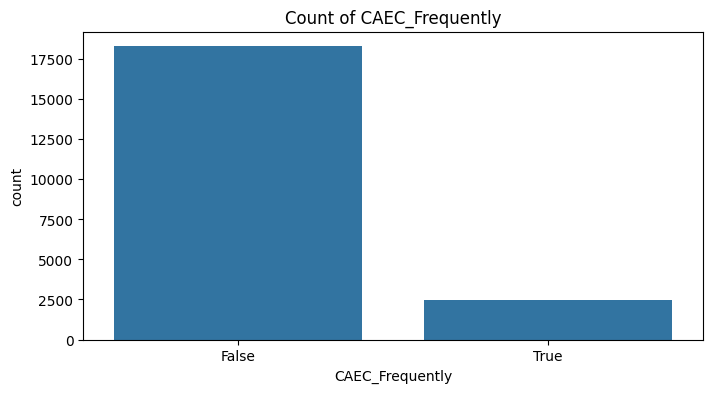

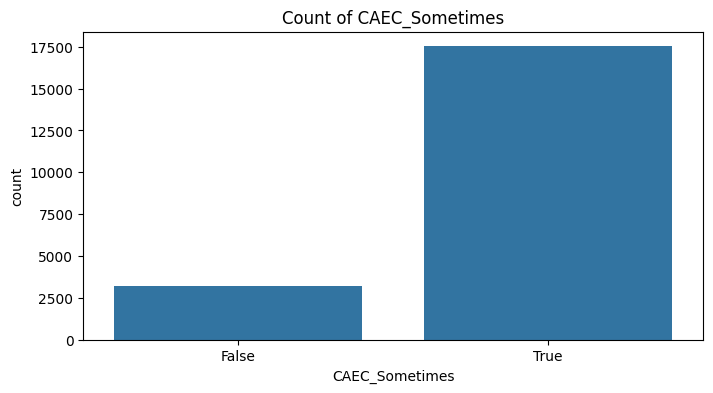

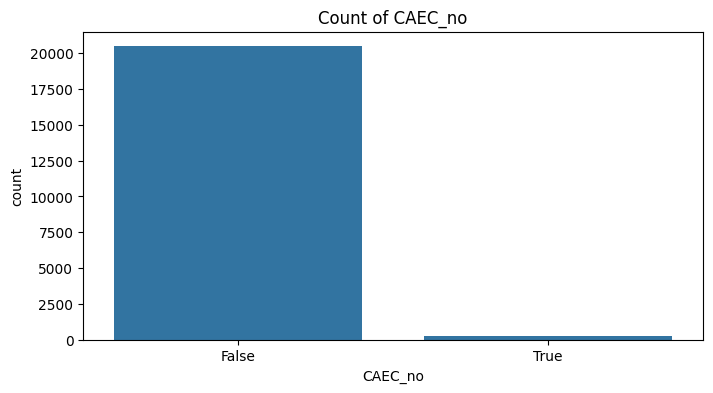

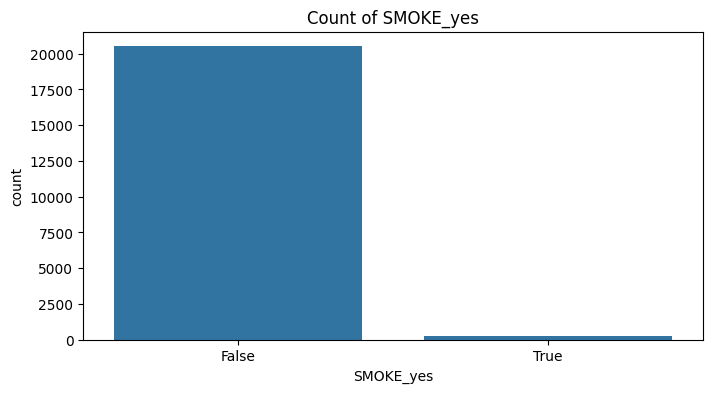

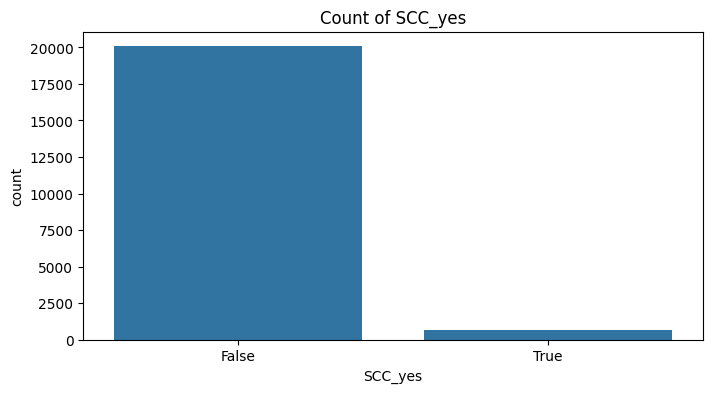

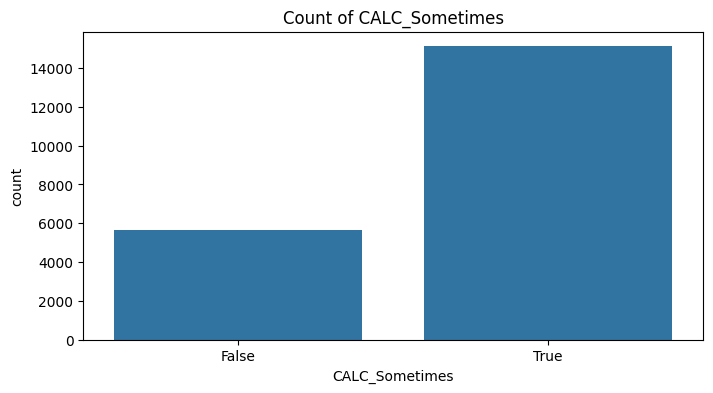

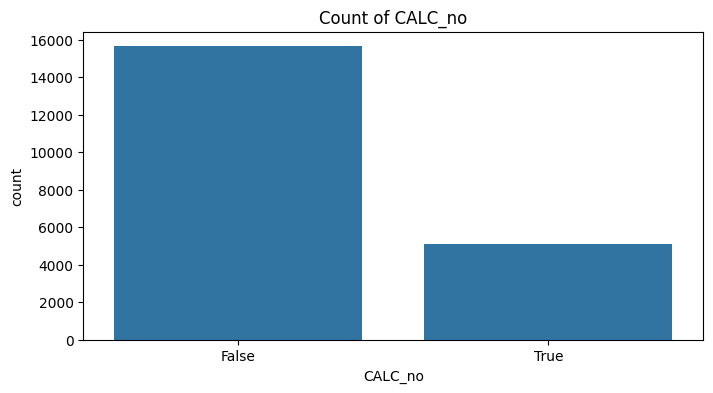

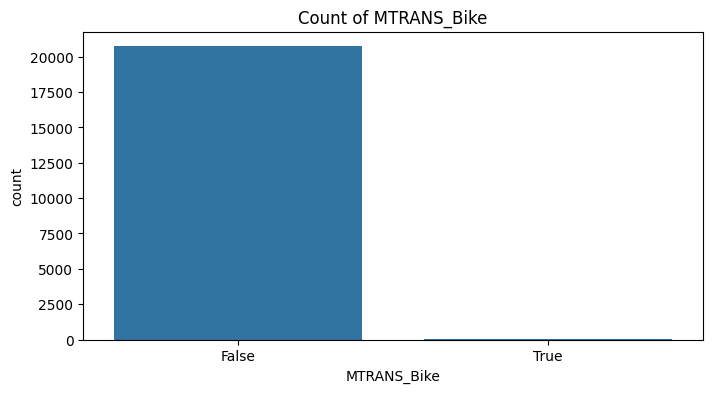

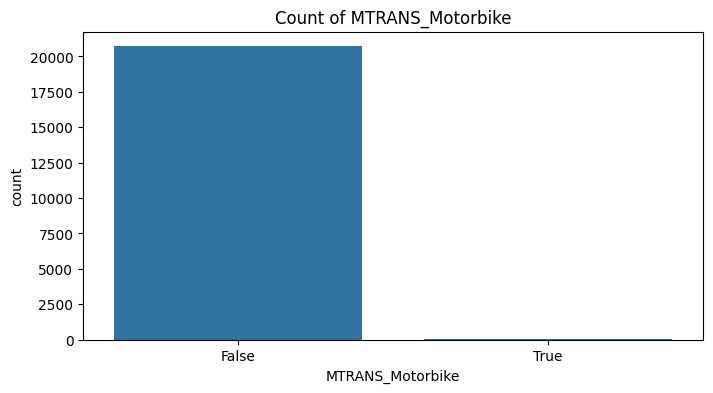

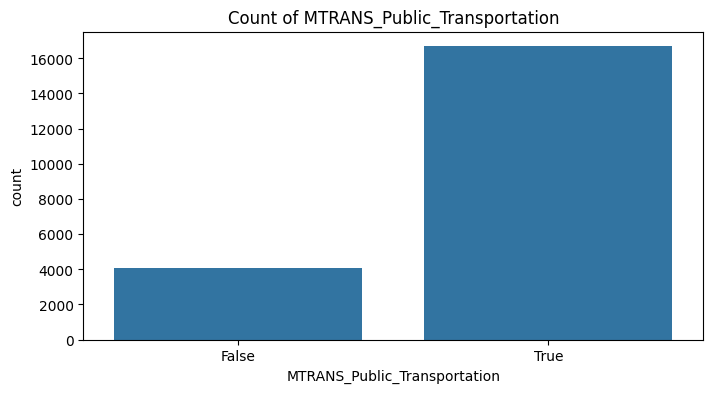

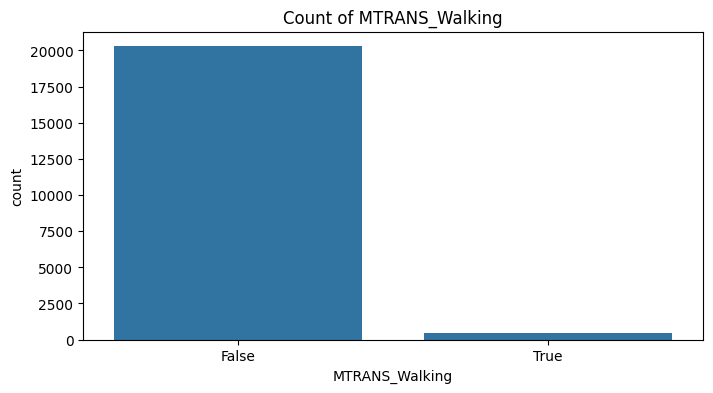

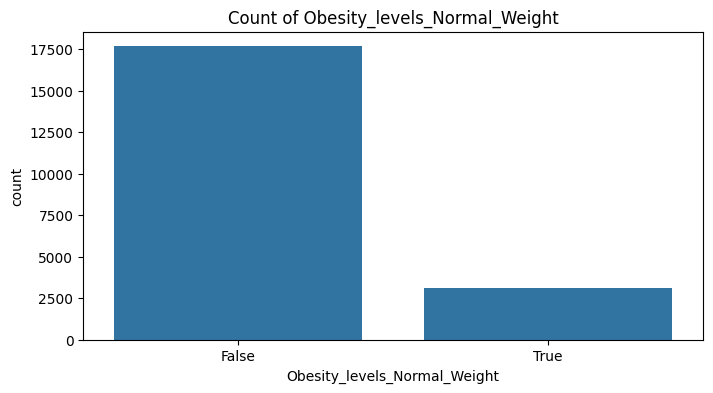

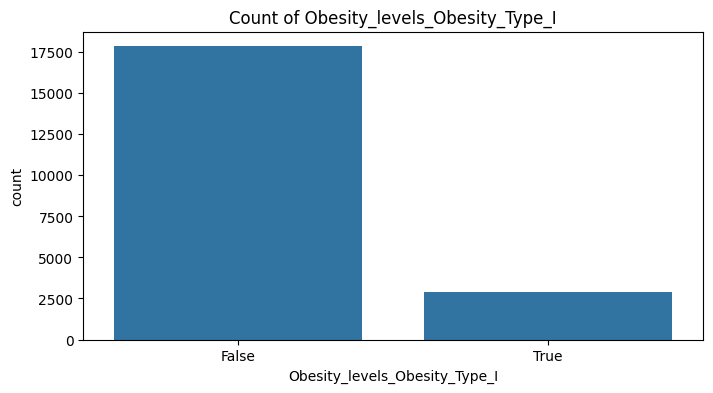

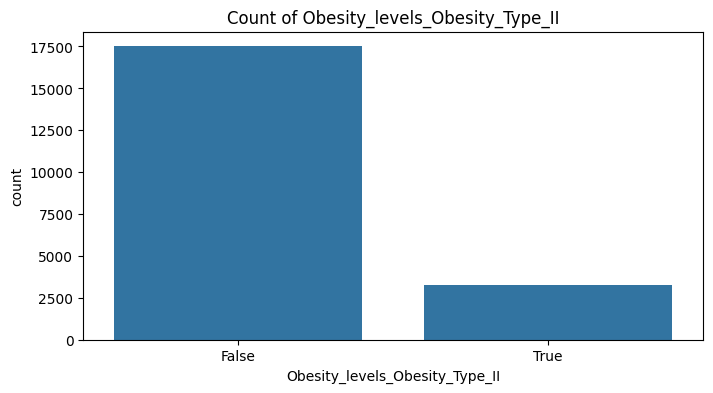

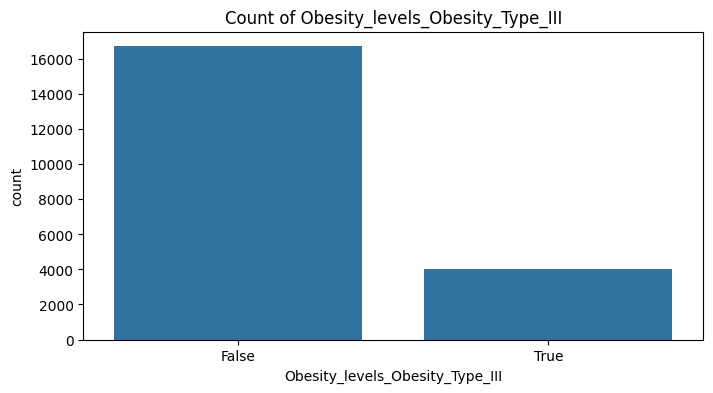

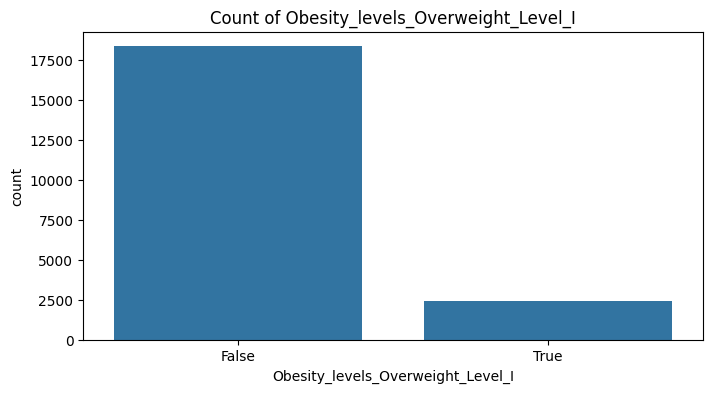

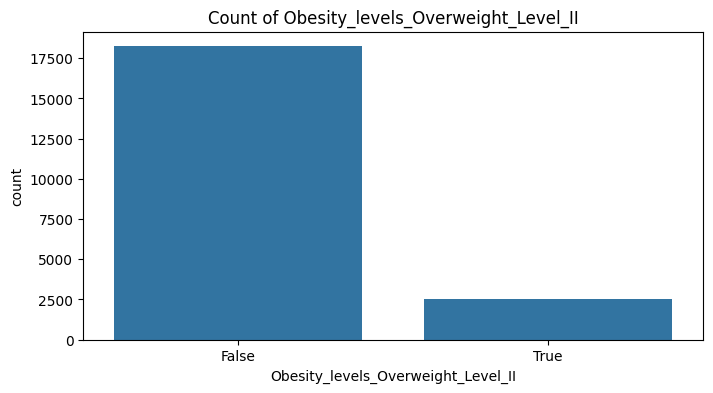

In [ ]:
categorical_features = data.select_dtypes(include=['bool']).columns

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f"Count of {col}")
    plt.show()


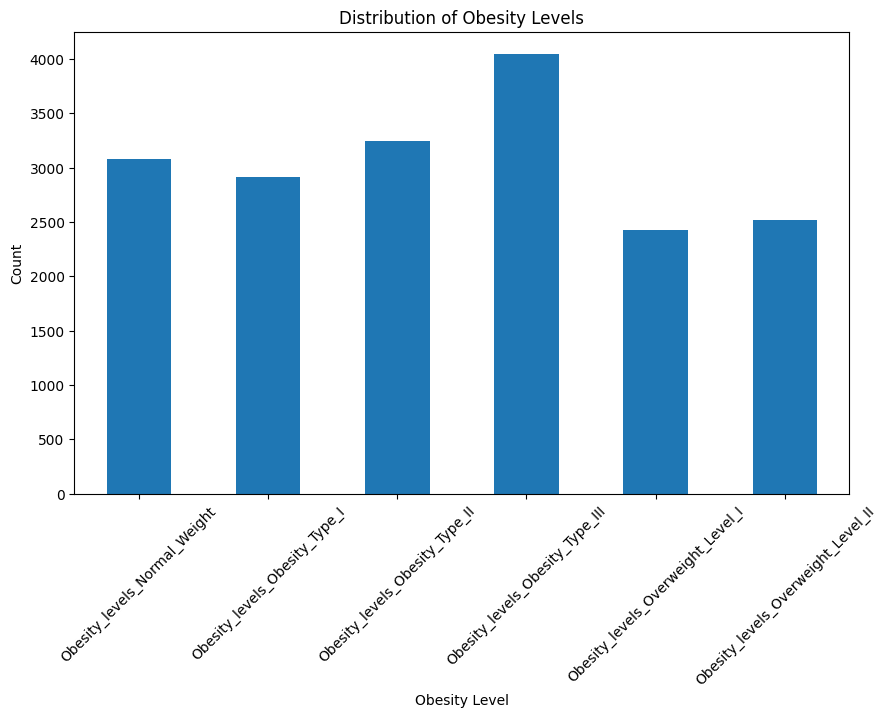

In [ ]:
# Distribution of target obesity levels
plt.figure(figsize=(10, 6))
obesity_columns = [col for col in data.columns if 'Obesity_levels' in col]
data[obesity_columns].sum().plot(kind='bar')
plt.title("Distribution of Obesity Levels")
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


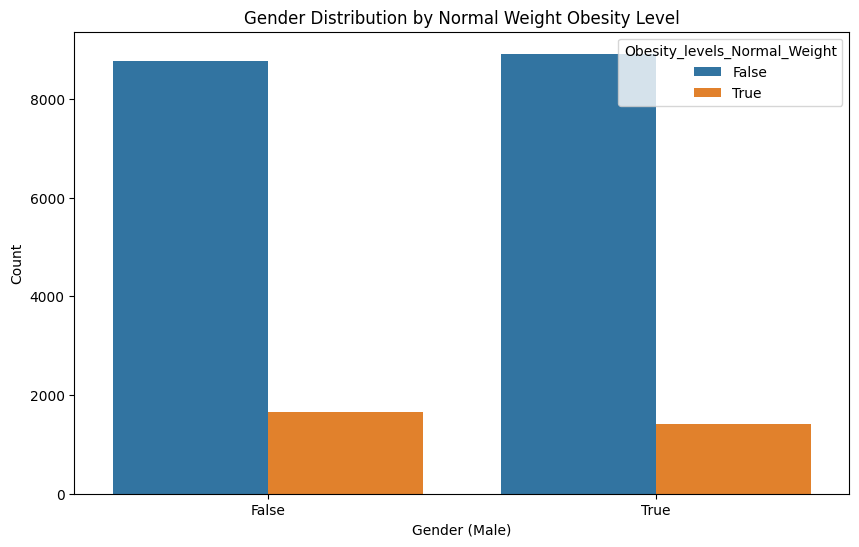

In [ ]:
# Count plot segmented by obesity level (example for 'Gender_Male' feature)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Gender_Male", hue="Obesity_levels_Normal_Weight")
plt.title("Gender Distribution by Normal Weight Obesity Level")
plt.xlabel("Gender (Male)")
plt.ylabel("Count")
plt.show()


In [ ]:
# feature selection
import numpy as np

# Create a correlation matrix
correlation_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
high_correlation = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# Drop highly correlated features
data = data.drop(columns=high_correlation)
print(f"Dropped highly correlated features: {high_correlation}")


Dropped highly correlated features: ['CALC_no']


In [ ]:
# data splitting
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
obesity_columns = [col for col in data.columns if 'Obesity_levels' in col]
X = data.drop(columns=obesity_columns)
y = data[obesity_columns]

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 16605 samples
Testing set size: 4152 samples


In [ ]:
# Models
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# Initialize Logistic Regression model within a MultiOutputClassifier for multi-label classification
logreg_model = MultiOutputClassifier(LogisticRegression(max_iter=500, random_state=42))
logreg_model.fit(X_train, y_train)

# Predict on test data
y_pred_logreg = logreg_model.predict(X_test)


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model within a MultiOutputClassifier for multi-label classification
rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)


In [ ]:
# XG Forest
!pip install xgboost




In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost model within a MultiOutputClassifier for multi-label classification
xgb_model = MultiOutputClassifier(XGBClassifier(eval_metric='mlogloss', random_state=42))
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
# SVM
from sklearn.svm import SVC

# Initialize SVM model within a MultiOutputClassifier
svm_model = MultiOutputClassifier(SVC(probability=True, random_state=42))
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model within a MultiOutputClassifier
knn_model = MultiOutputClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test)


In [ ]:
# Evalution of the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define a function to evaluate the model
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average="weighted"))
    print("Recall:", recall_score(y_test, y_pred, average="weighted"))
    print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate each model
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")


Evaluation Metrics for Logistic Regression:

Accuracy: 0.5040944123314065
Precision: 0.7182035086050518
Recall: 0.503015350877193
F1 Score: 0.5507000110738379

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.21      0.28       634
           1       0.60      0.30      0.40       576
           2       0.94      0.96      0.95       634
           3       1.00      1.00      1.00       802
           4       0.65      0.09      0.16       481
           5       0.59      0.15      0.24       521

   micro avg       0.81      0.50      0.62      3648
   macro avg       0.70      0.45      0.50      3648
weighted avg       0.72      0.50      0.55      3648
 samples avg       0.43      0.44      0.44      3648

Evaluation Metrics for Random Forest:

Accuracy: 0.8533236994219653
Precision: 0.9188666505864101
Recall:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

 0.8462171052631579
F1 Score: 0.8779966351515102

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       634
           1       0.92      0.82      0.87       576
           2       0.98      0.97      0.97       634
           3       1.00      1.00      1.00       802
           4       0.85      0.58      0.69       481
           5       0.84      0.72      0.78       521

   micro avg       0.92      0.85      0.88      3648
   macro avg       0.91      0.82      0.86      3648
weighted avg       0.92      0.85      0.88      3648
 samples avg       0.74      0.74      0.74      3648

Evaluation Metrics for XGBoost:

Accuracy: 0.8795761078998073
Precision: 0.9049713844848123
Recall: 0.8887061403508771
F1 Score: 0.8962825209937811

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       634
           1       0.90      0.86      0.88    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [ ]:
# Based on the evaluation results, here’s a summary and short conclusion for each model:

# Logistic Regression

# Accuracy: 50.4%
# Precision: 71.8%
# Recall: 50.3%
# F1 Score: 55.1%
# Conclusion: Logistic Regression shows moderate performance, but its accuracy and recall are relatively low, indicating that it may struggle with capturing the complexity of this multi-label classification task.
# Random Forest

# Accuracy: 85.3%
# Precision: 91.9%
# Recall: 84.6%
# F1 Score: 87.8%
# Conclusion: Random Forest performs well, achieving high accuracy and F1 scores. It effectively captures the relationships within the data, making it a strong candidate for this classification task.
# XGBoost

# Accuracy: 87.9%
# Precision: 90.5%
# Recall: 88.9%
# F1 Score: 89.6%
# Conclusion: XGBoost outperforms other models slightly, with the highest accuracy and F1 score. This suggests that XGBoost is capable of handling complex patterns in the data and might be the best model for this task.
# Support Vector Machine (SVM)

# Accuracy: 70.9%
# Precision: 86.9%
# Recall: 69.4%
# F1 Score: 74.7%
# Conclusion: SVM has decent performance but falls short compared to Random Forest and XGBoost. It struggles with recall, indicating that it might not capture all the nuances in the data.
# K-Nearest Neighbors (KNN)

# Accuracy: 72.3%
# Precision: 78.6%
# Recall: 71.1%
# F1 Score: 74.2%
# Conclusion: KNN has moderate performance. Its relatively low recall and accuracy indicate that it may not be the best model for this multi-label classification problem.

In [ ]:
# Overall Conclusion
# XGBoost and Random Forest are the top-performing models, with XGBoost slightly outperforming Random Forest in accuracy, recall, and F1 score.
# XGBoost appears to be the most suitable model for this task due to its ability to capture complex relationships in the data, resulting in the highest accuracy and F1 score.

In [ ]:
# Recommendation
# Consider using XGBoost as the final model. Further tuning of hyperparameters for XGBoost or Random Forest might improve performance even more,
# but XGBoost’s current results indicate strong suitability for this classification problem.

In [ ]:
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__subsample': [0.7, 0.8, 0.9]
}

# Initialize Grid Search with XGBoost model wrapped in MultiOutputClassifier
xgb_model = MultiOutputClassifier(XGBClassifier(eval_metric='mlogloss', random_state=42))
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 7, 'estimator__n_estimators': 200, 'estimator__subsample': 0.9}
Best Score: 0.879735019572418


In [ ]:
# Train the final model with the best parameters
best_xgb_model = MultiOutputClassifier(
    XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=200,
        subsample=0.9,
        eval_metric='mlogloss',
        random_state=42
    )
)
best_xgb_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred_best = best_xgb_model.predict(X_test)

# Evaluate the final model
evaluate_model(y_test, y_test_pred_best, "Tuned XGBoost")


Evaluation Metrics for Tuned XGBoost:

Accuracy: 0.8836705202312138
Precision: 0.9084689635122505
Recall: 0.8878837719298246
F1 Score: 0.8975293360172968

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       634
           1       0.91      0.86      0.88       576
           2       0.97      0.97      0.97       634
           3       1.00      1.00      1.00       802
           4       0.82      0.71      0.76       481
           5       0.81      0.82      0.81       521

   micro avg       0.91      0.89      0.90      3648
   macro avg       0.90      0.87      0.89      3648
weighted avg       0.91      0.89      0.90      3648
 samples avg       0.78      0.78      0.78      3648



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train the final model with the best parameters
best_xgb_model = MultiOutputClassifier(
    XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=200,
        subsample=0.9,
        eval_metric='mlogloss',
        random_state=42
    )
)
best_xgb_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred_best = best_xgb_model.predict(X_test)

# Evaluate the final model
evaluate_model(y_test, y_test_pred_best, "Tuned XGBoost")


Evaluation Metrics for Tuned XGBoost:

Accuracy: 0.8836705202312138
Precision: 0.9084689635122505
Recall: 0.8878837719298246
F1 Score: 0.8975293360172968

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       634
           1       0.91      0.86      0.88       576
           2       0.97      0.97      0.97       634
           3       1.00      1.00      1.00       802
           4       0.82      0.71      0.76       481
           5       0.81      0.82      0.81       521

   micro avg       0.91      0.89      0.90      3648
   macro avg       0.90      0.87      0.89      3648
weighted avg       0.91      0.89      0.90      3648
 samples avg       0.78      0.78      0.78      3648



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(best_xgb_model, 'final_xgboost_model.pkl')
print("Final model saved as 'final_xgboost_model.pkl'")


Final model saved as 'final_xgboost_model.pkl'
